In [58]:
from astropy.io import fits
import pandas as pd

# Read fits files
# file_path = 'final_matched_highz_catalogue.fits'  # the fits table from the outcome of the scripts
# with fits.open(file_path) as hdul:
#     data = hdul[1].data  # 
#     df = pd.DataFrame(data)  # to Pandas DataFrame
data_path = '../final_matched_highz_catalogue.csv'  # the output csv file
df=pd.read_csv(data_path, encoding='gbk')  # read the csv file
# check the columns and first few rows
print(df.columns)
print(df.head())

Index(['sdss_name', 'sdss_ra', 'sdss_dec', 'sdss_z', 'z_reliable_flag',
       'sdss_source_z', 'sdss_zwarning', 'FIRST', 'source_tier_first',
       'Fpeak_first', 'Fint_first', 'Rms_first', 'NVSS', 'source_tier_nvss',
       'S1.4_nvss', 'e_S1.4_nvss', 'GLEAM', 'source_tier_gleam',
       'Fpwide_gleam', 'e_Fpwide_gleam', 'Fintwide_gleam', 'e_Fintwide_gleam',
       'RACS-DR1', 'source_tier_racs', 'Fpk_racs', 'e_Fpk_racs', 'Ftot_racs',
       'e_Ftot_racs', 'source_tier_flag'],
      dtype='object')
            sdss_name   sdss_ra  sdss_dec  sdss_z  z_reliable_flag  \
0  000017.32-044502.3  0.072189 -4.750661   3.275                2   
1  000023.29+014501.8  0.097058  1.750519   3.097                2   
2  000051.56+001202.5  0.214857  0.200716   3.865                1   
3  000154.27+094414.9  0.476156  9.737474   4.859                3   
4  000215.84+021744.6  0.566032  2.295731   3.111                2   

  sdss_source_z  sdss_zwarning             FIRST  source_tier_first  \
0

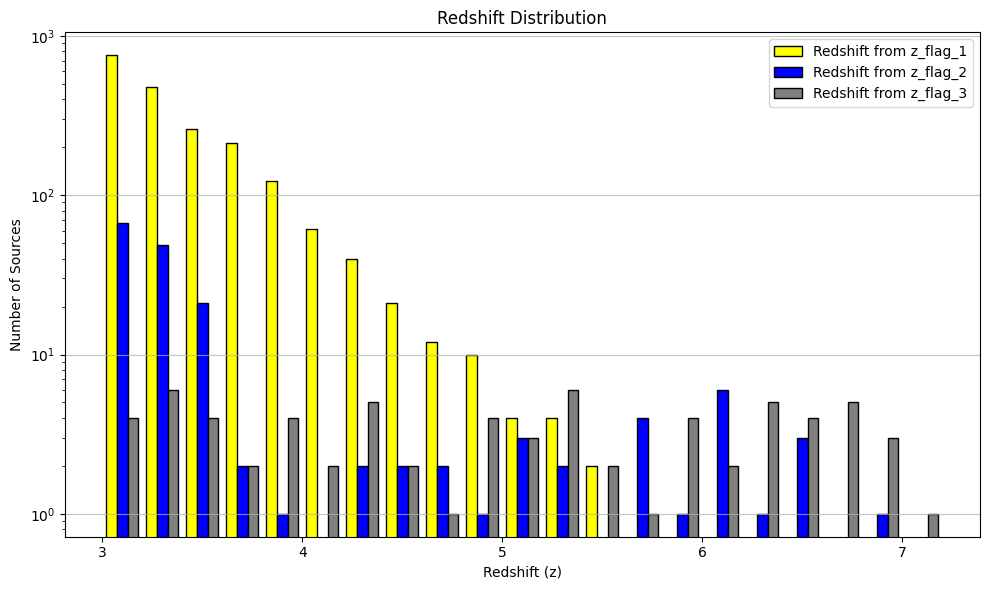

In [60]:
from matplotlib import pyplot as plt

#draw the hitogram figure for redshift distribution
plt.figure(figsize=(10, 6))
# start from z= 3 and ends at z= 7.2, bin width is 0.2
z_flag_1 = df[df['z_reliable_flag'] == 1]['sdss_z']
z_flag_2 = df[df['z_reliable_flag'] == 2]['sdss_z']
z_flag_3 = df[df['z_reliable_flag'] == 3]['sdss_z']
z_all = df['sdss_z']

plt.hist([z_flag_1, z_flag_2, z_flag_3], bins=21, range=(3, 7.2),
         stacked=False,
         edgecolor='black',
         color=['yellow', 'blue', 'grey'],
         label=['Redshift from z_flag_1', 'Redshift from z_flag_2', 'Redshift from z_flag_3'])
#bin_edges = np.linspace(3, 7.2, 22); width = 0.2
# plt.hist(df['sdss_z'], bins=21, range=(3, 7.2), color='blue', edgecolor='black')
# plt.hist(z_flag_3, bins=bin_edges, alpha=0.9, width=width/3, align='mid', color='grey', label='Redshift from z_flag_3', rwidth=0.9)
# plt.hist(z_flag_2, bins=bin_edges, alpha=0.9, width=width/3, align='mid', color='blue', label='Redshift from z_flag_2', rwidth=0.9, 
#          histtype='bar', bottom=None)
# plt.hist(z_flag_1, bins=bin_edges, alpha=0.9, width=width/3, align='mid', color='yellow', label='Redshift from z_flag_1', rwidth=0.9, 
#          histtype='bar', bottom=None)
# # add another histogram for only sdss_source_z != PIPE
# plt.hist(df[df['sdss_source_z'] != 'PIPE']['sdss_z'], bins=21, range=(3, 7.2), color='yellow', alpha=0.5, edgecolor='white')
plt.legend(loc='upper right')
plt.title('Redshift Distribution')
plt.xlabel('Redshift (z)')
plt.ylabel('Number of Sources')
plt.grid(axis='y', alpha=0.75)
# using log scale for y-axis
plt.yscale('log')
plt.tight_layout()
plt.savefig('redshift_distribution.pdf', format='pdf',  dpi=300)
plt.show()

In [61]:
# show the numbers of every redshift range
# z>3 is 1515
# check z>4 
print("Number of sources with z >= 3:", len(df[df['sdss_z'] >= 3]))
# check z>4
print("Number of sources with z >= 4:", len(df[df['sdss_z'] >= 4]))
# check z>5
print("Number of sources with z >= 5:", len(df[df['sdss_z'] >= 5]))
# check z>6
print("Number of sources with z >= 6:", len(df[df['sdss_z'] >= 6]))
# check z>7
print("Number of sources with z >= 7:", len(df[df['sdss_z'] >= 7]))
# for a statistical check, just look for source_tier_first =1 source with each redshift range
print("Number of sources with z >= 3 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 3) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 3 and source_tier_first = 1
print("Number of sources with z >= 4 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 4) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 5 and source_tier_first = 1
print("Number of sources with z >= 5 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 5) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 6 and source_tier_first = 1
print("Number of sources with z >= 6 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 6) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 7 and source_tier_first = 1
print("Number of sources with z >= 7 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 7) & (df['source_tier_first'] == 1)]))

# COunt source numbers that has sdss_source_z != PIPE & source_z > 5
print("Number of sources with reliable redshift: ", len(df[(df['z_reliable_flag'] ==1) & (df['sdss_z'] >= 5) ]))





Number of sources with z >= 3: 2222
Number of sources with z >= 4: 232
Number of sources with z >= 5: 67
Number of sources with z >= 6: 31
Number of sources with z >= 7: 1
Number of sources with z >= 3 and source_tier_first = 1: 1518
Number of sources with z >= 4 and source_tier_first = 1: 180
Number of sources with z >= 5 and source_tier_first = 1: 52
Number of sources with z >= 6 and source_tier_first = 1: 25
Number of sources with z >= 7 and source_tier_first = 1: 1
Number of sources with reliable redshift:  10


### Figure 2, draw the radio detection rate vs redshift figure.

In [62]:
# 读取 FITS 文件
import numpy as np
from astropy.table import Table

file_path = 'tmp_sdssz3.fits' 
with fits.open(file_path) as hdul:
    data = hdul[1].data
    # 创建新的字段字典，每列单独判断处理
    fixed_columns = {}
    for name in data.names:
        col = data[name]
        # 如果是数字列，就转换为本地字节序（避免 big-endian 报错）
        if np.issubdtype(col.dtype, np.number):
            fixed_columns[name] =  col.byteswap().view(col.dtype.newbyteorder())
        else:
            fixed_columns[name] = col  # 字符串或 bool 列保留

    # 转换为 DataFrame
    df2 = pd.DataFrame(fixed_columns)
# 查看列名和前几行
print(df2.columns)
print(df2.head())
source_z = df2['Z']
source_z

Index(['SDSS_NAME', 'RA', 'DEC', 'Z', 'SOURCE_Z', 'Z_PIPE', 'ZWARNING', 'Z_VI',
       'Z_CONF', 'IS_QSO_QN', 'Z_QN', 'Z_10K', 'Z_CONF_10K', 'Z_PCA',
       'ZWARN_PCA'],
      dtype='object')
            SDSS_NAME        RA        DEC      Z SOURCE_Z    Z_PIPE  \
0  000001.41+200044.1  0.005912  20.012258  3.090       VI  3.087898   
1  000001.81+141150.5  0.007579  14.197385  3.711       VI  3.712188   
2  000005.19+134227.5  0.021651  13.707654  3.009       VI  3.008373   
3  000005.88+340252.3  0.024507  34.047872  3.124       VI  3.123698   
4  000006.38-065404.9  0.026617  -6.901368  3.250       VI  3.249989   

   ZWARNING   Z_VI  Z_CONF  IS_QSO_QN      Z_QN  Z_10K  Z_CONF_10K     Z_PCA  \
0         0  3.090       3          1  3.082407   -1.0          -1  3.082024   
1         0  3.711       3          1  3.713385   -1.0          -1  3.702116   
2         0  3.009       3          1  3.005653   -1.0          -1  2.998241   
3         0  3.124       3          1  3.116898   -1.0

0        3.090000
1        3.711000
2        3.009000
3        3.124000
4        3.250000
           ...   
39546    3.126000
39547    3.167000
39548    3.066000
39549    3.309383
39550    3.109000
Name: Z, Length: 39551, dtype: float64

In [63]:
# check z>3
print("Number of sources with z >= 3:", len(df2[source_z >= 3.0]))
print("Number of sources with 3 <= z < 4:", len(df2[(source_z >= 3) & (source_z < 4)]))
# check z>4
print("Number of sources with z >= 4:", len(df2[source_z >= 4.0]))
print("Number of sources with 4 <= z < 5:", len(df2[(source_z >= 4) & (source_z < 5)]))
# check z>5
print("Number of sources with z >= 5:", len(df2[source_z >= 5]))


Number of sources with z >= 3: 39551
Number of sources with 3 <= z < 4: 36545
Number of sources with z >= 4: 3006
Number of sources with 4 <= z < 5: 2349
Number of sources with z >= 5: 657


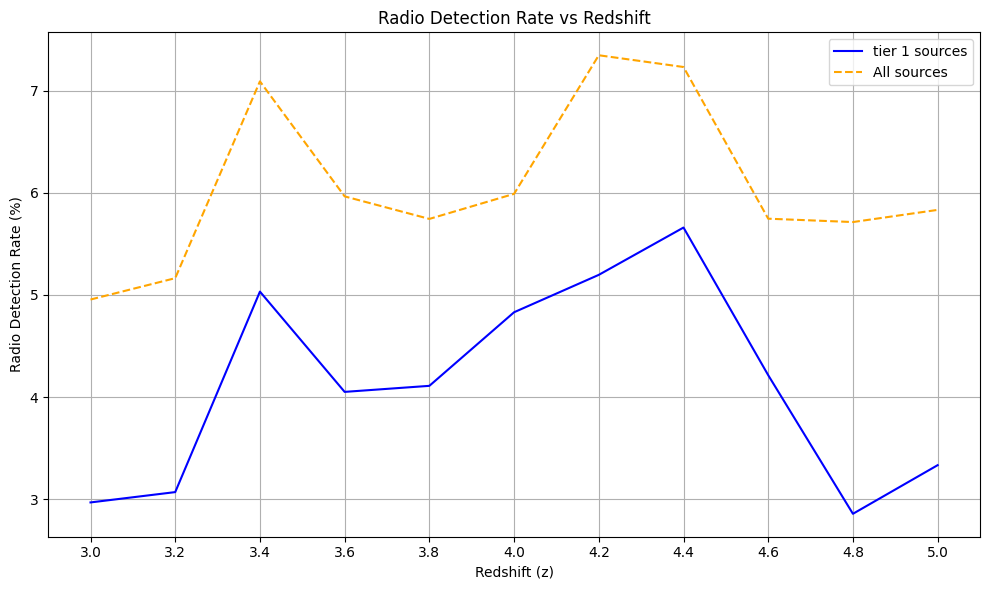

In [64]:
# make a plot for radio detection rate along different redshift bins
import matplotlib.pyplot as plt
import numpy as np
# Define redshift bins and their edges
data_bin_width = 0.2
redshift_bins = np.arange(3, 5.2, data_bin_width)
# Define the number of sources in each bin
radio_detection_rate = []
radio_detection_rate2 = []
optical_number = []
for z in redshift_bins:
    # Count sources with z in the current bin and source_tier_first = 1
    radio_count = len(df[(df['sdss_z'] >= z) &(df['z_reliable_flag'] ==1)& (df['source_tier_first'] == 1) & (df['sdss_z'] < z + data_bin_width)])
    radio_count2 = len(df[(df['sdss_z'] >= z) &(df['z_reliable_flag'] <=2)& (df['sdss_z'] < z + data_bin_width)])
    optical_count = len(df2[(source_z >= z) & (source_z < z + data_bin_width)])
    radio_rate = radio_count / optical_count if optical_count > 0 else 0
    count = radio_rate * 100  # Convert to percentage
    count2 = radio_count2 / optical_count * 100 if optical_count > 0 else 0
    radio_detection_rate.append(count)
    radio_detection_rate2.append(count2)
    optical_number.append(optical_count)
# Plotting the radio detection rate
plt.figure(figsize=(10, 6))
plt.plot(redshift_bins, radio_detection_rate, linestyle='-', color='blue', label='tier 1 sources')
plt.plot(redshift_bins, radio_detection_rate2, linestyle='--', color='orange', label='All sources')
# plt.plot(redshift_bins, optical_number, linestyle='--', color='green', label='All optical sources')
plt.title('Radio Detection Rate vs Redshift')
plt.xlabel('Redshift (z)')
plt.ylabel('Radio Detection Rate (%)')
plt.xticks(np.arange(3, 5.2, 0.2))
# plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('radio_detection_rate_vs_redshift.pdf', format='pdf', dpi=300)
plt.show()

### Figure 3: the distribution of angular separation vs source_tier_flag

In [65]:
file_path = 'ref_o1r1234_all_sources.fits' 
with fits.open(file_path) as hdul:
    data = hdul[1].data
    # 创建新的字段字典，每列单独判断处理
    fixed_columns = {}
    for name in data.names:
        col = data[name]
        # 如果是数字列，就转换为本地字节序（避免 big-endian 报错）
        if np.issubdtype(col.dtype, np.number):
            fixed_columns[name] = col.byteswap().view(col.dtype.newbyteorder())
        else:
            fixed_columns[name] = col  # 字符串或 bool 列保留

    # 转换为 DataFrame
    df2 = pd.DataFrame(fixed_columns)
# 查看列名和前几行
print(df2.columns)

Index(['sdss_name', 'sdss_ra', 'sdss_dec', 'sdss_z', 'sdss_source_z',
       'sdss_z_pipe', 'sdss_zwarning', 'sdss_z_vi', 'sdss_z_conf',
       'sdss_is_qso_qn', 'sdss_z_qn', 'FIRST_r1', 'RA_deg_r1', 'DEC_deg_r1',
       'Fpeak_r1', 'Fint_r1', 'Rms_r1', 'Maj_r1', 'Min_r1', 'PA_r1',
       'Separation_first', 'GroupID_first', 'GroupSize_first',
       'GrpSize_before_first', 'group_z_min_first', 'source_tier_first',
       'NVSS_r2', 'RA_deg_r2', 'e_RAJ2000_r2', 'DEC_deg_r2', 'e_DEJ2000_r2',
       'S1.4_r2', 'e_S1.4_r2', 'MajAxis_r2', 'MinAxis_r2', 'Separation_nvss',
       'GrpSize_before_nvss', 'group_z_min_nvss', 'GroupID_nvss',
       'GroupSize_nvss', 'source_tier_nvss', 'GLEAM_r3', 'RA_deg_r3',
       'e_RAJ2000_r3', 'DEC_deg_r3', 'e_DEJ2000_r3', 'Fpwide_r3',
       'e_Fpwide_r3', 'Fintwide_r3', 'e_Fintwide_r3', 'awide_r3', 'e_awide_r3',
       'bwide_r3', 'e_bwide_r3', 'pawide_r3', 'psfawide_r3', 'psfbwide_r3',
       'psfPAwide_r3', 'Separation_gleam', 'GrpSize_before_gleam',
 

In [73]:
hz_df2=df2[df2['sdss_z'] >= 3.0]
#drop the original index of hz_df2
hz_df2.reset_index(drop=True, inplace=True)
hz_df=df[df['sdss_z'] >= 3].reset_index(drop=True)
z_reliable_flag = hz_df['z_reliable_flag']
source_tier_flag = hz_df['source_tier_flag']
# concat the two Series with the hz_df2 and form new_hz_df2
new_hz_df2 = pd.concat([hz_df2, z_reliable_flag, source_tier_flag], axis=1)
new_hz_df2 = new_hz_df2[(new_hz_df2['z_reliable_flag']==1) & (new_hz_df2['source_tier_flag'] > 0)].reset_index(drop=True)
new_hz_df2 = new_hz_df2[(new_hz_df2['source_tier_nvss']!=3) & (new_hz_df2['source_tier_gleam']!=3) & (new_hz_df2['source_tier_gleam']!=2)].reset_index(drop=True)
new_hz_df2

,sdss_name,sdss_ra,sdss_dec,sdss_z,sdss_source_z,sdss_z_pipe,sdss_zwarning,sdss_z_vi,sdss_z_conf,sdss_is_qso_qn,...,e_bmin0_r4,e_PA0_r4,Separation_racs,GroupID_racs,GroupSize_racs,GrpSize_before_racs,group_z_min_racs,source_tier_racs,z_reliable_flag,source_tier_flag
0,000051.56+001202.5,0.214857,0.200716,3.865,VI,3.880901,4,3.865,3,1,...,NaN,NaN,NaN,-2147483648,-2147483648,-2147483648,-32768,-2147483648,1,5.0
1,000221.12+002149.3,0.588001,0.363704,3.070,VI,3.050011,0,3.070,3,1,...,1.24,64.379997,0.322844,-2147483648,1,1,-32768,1,1,7.0
2,000252.72-000330.9,0.719701,-0.058607,3.679,VI,3.678771,0,3.679,3,1,...,NaN,NaN,NaN,-2147483648,-2147483648,-2147483648,-32768,-2147483648,1,1.0
3,000420.93-094615.7,1.087243,-9.771050,3.019,VI,3.019800,0,3.019,3,1,...,0.31,9.330000,0.205154,-2147483648,1,1,-32768,1,1,15.0
4,000423.99-102050.1,1.099997,-10.347267,3.144,VI,3.145267,0,3.144,3,1,...,NaN,NaN,NaN,-2147483648,-2147483648,-2147483648,-32768,-2147483648,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,123604.19+030341.8,189.017474,3.061632,4.577,VI,4.532132,0,4.577,3,1,...,3.89,38.349998,1.832555,-2147483648,1,1,-32768,1,1,2.0
1953,144228.36+252922.5,220.618187,25.489601,3.070,VI,3.069491,0,3.070,3,1,...,3.61,132.039993,2.886591,-2147483648,1,1,-32768,1,1,2.0
1954,144648.05+162903.4,221.700234,16.484293,3.216,VI,3.215247,0,3.216,3,1,...,5.00,51.950001,3.913018,-2147483648,1,1,-32768,1,1,2.0
1955,221637.18+124844.3,334.154946,12.812308,3.124,VI,3.124076,64,3.124,3,1,...,5.83,179.869995,1.914832,-2147483648,1,1,-32768,1,1,2.0


/tmp/ipykernel_12805/1220296939.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


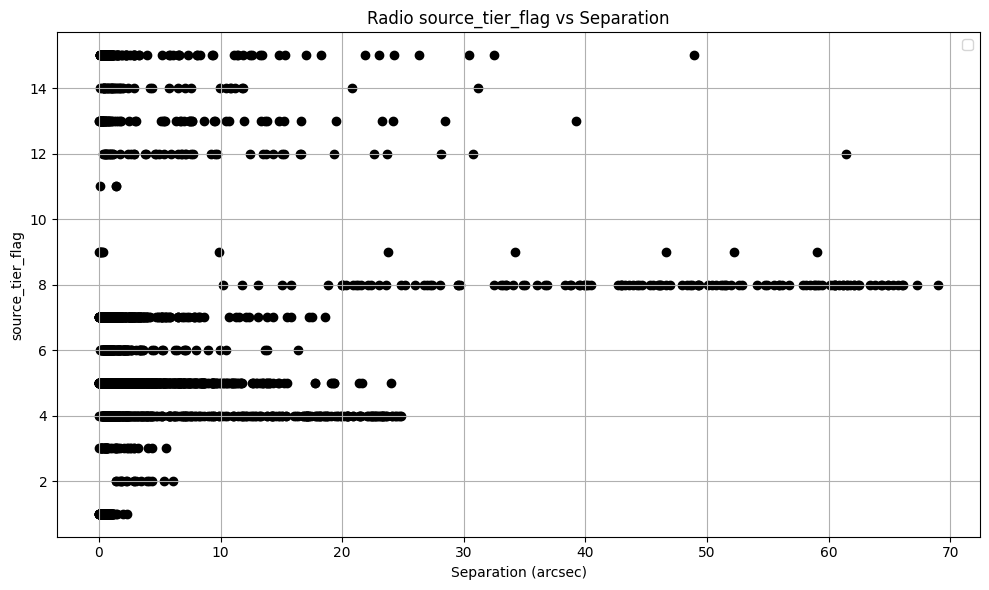

In [74]:
# Plotting the separation distribution with source_tier_flag
tier_flag = new_hz_df2['source_tier_flag']
first_sep = new_hz_df2['Separation_first']
nvss_sep = new_hz_df2['Separation_nvss']
gleam_sep = new_hz_df2['Separation_gleam']
racs_sep = new_hz_df2['Separation_racs']


plt.figure(figsize=(10, 6))
plt.scatter(first_sep, tier_flag, color='black')
plt.scatter(racs_sep, tier_flag, color='black')
plt.scatter(nvss_sep, tier_flag, color='black')
plt.scatter(gleam_sep, tier_flag, color='black')
# plt.plot(redshift_bins, radio_detection_rate2, linestyle='--', color='orange', label='All sources')
# plt.plot(redshift_bins, optical_number, linestyle='--', color='green', label='All optical sources')
plt.title('Radio source_tier_flag vs Separation')
plt.xlabel('Separation (arcsec)')
plt.ylabel('source_tier_flag')
# plt.xticks(np.arange(3, 5.2, 0.2))
# plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('source_tier_flag vs separation.pdf', format='pdf', dpi=300)
plt.show()

In [79]:
test_df=new_hz_df2[(new_hz_df2['source_tier_flag']>=12)]
test_df = test_df[['sdss_name','Separation_gleam']]
test_df.sort_values(by='Separation_gleam', ascending=True, inplace=True)
print(test_df)
# test_df.to_csv('test_df.csv', index=False)

               sdss_name  Separation_gleam
1401  011747.86+011407.6          1.179274
15    003843.98+031120.9          1.807452
1406  012812.91-053221.0          1.942228
942   135406.89-020603.2          2.161774
527   110147.88+001039.4          2.233291
...                  ...               ...
1645  134056.21+105827.4         31.207047
882   133121.81+000248.4         32.512448
221   085624.91+102017.0         39.264165
334   094113.55+114532.2         48.921996
1454  083955.38+025145.4         61.421502

[112 rows x 2 columns]
